In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:

# 2. Load Dataset

file_path = r"C:\Users\Swati\Documents\All Resume\Prediction Data.xlsx"
sheet_name = "vw_ChurnData"

data = pd.read_excel(file_path, sheet_name=sheet_name)

print("Data loaded:", data.shape)
print("Columns:", data.columns.tolist())
data.head()


Data loaded: (6007, 32)
Columns: ['Customer_ID', 'Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason']


Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Withdrawal      49.150002    169.050003          0.00   
2  Bank Withdrawal     116.050003   8297.500000         42.57   
3      Credit Card      84.400002   5969.299805          0.00   
4      Credit Card      72.599998   4084.350098          0.00   

  Total_Extra_Data_Charges Total_Long_Distance_Charges Total_Revenue  \
0                        0                  631.719971   7315.120117   
1                       10                  122.370003    301.420013   
2                      110                 1872.979980  10237.910156   
3                        0                  219.389999   6188.689941   
4                      140                  332.079987   4556.430176   

  Customer_Status Churn_Category                   Churn_Reason  
0          Stayed         Others                         Others  
1         Churned     Competitor  Competitor had better devices  
2          Stayed         Others                         Others  
3          Stayed         Others                         Others  
4          Stayed         Others                         Others  

[5 rows x 32 columns]

In [3]:

# 3. Data Preprocessing

# Drop columns not needed for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1, errors='ignore')

# Columns to encode
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Label encode categorical columns
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Encode target variable (Stayed=0, Churned=1)
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Drop rows with missing target
data = data.dropna(subset=['Customer_Status'])

print("Data after preprocessing:", data.shape)
data.head()


Data after preprocessing: (6007, 29)


Gender  Age  Married  State  Number_of_Referrals  Tenure_in_Months  \
0       0   30        1     11                    0                31   
1       1   51        0     15                    5                 9   
2       0   43        1     21                    3                28   
3       1   35        0     12                   10                12   
4       1   75        1     17                   12                27   

   Value_Deal  Phone_Service  Multiple_Lines  Internet_Service  ...  Contract  \
0           0              1               0                 1  ...         2   
1           4              1               0                 1  ...         0   
2           0              1               1                 1  ...         2   
3           5              1               0                 1  ...         2   
4           1              1               0                 1  ...         2   

   Paperless_Billing  Payment_Method  Monthly_Charge  Total_Charges  \
0                  0               0       95.099998    6683.399902   
1                  1               0       49.150002     169.050003   
2                  1               0      116.050003    8297.500000   
3                  1               1       84.400002    5969.299805   
4                  1               1       72.599998    4084.350098   

   Total_Refunds  Total_Extra_Data_Charges  Total_Long_Distance_Charges  \
0           0.00                         0                   631.719971   
1           0.00                        10                   122.370003   
2          42.57                       110                  1872.979980   
3           0.00                         0                   219.389999   
4           0.00                       140                   332.079987   

   Total_Revenue  Customer_Status  
0    7315.120117                0  
1     301.420013                1  
2   10237.910156                0  
3    6188.689941                0  
4    4556.430176                0  

[5 rows x 29 columns]

In [4]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



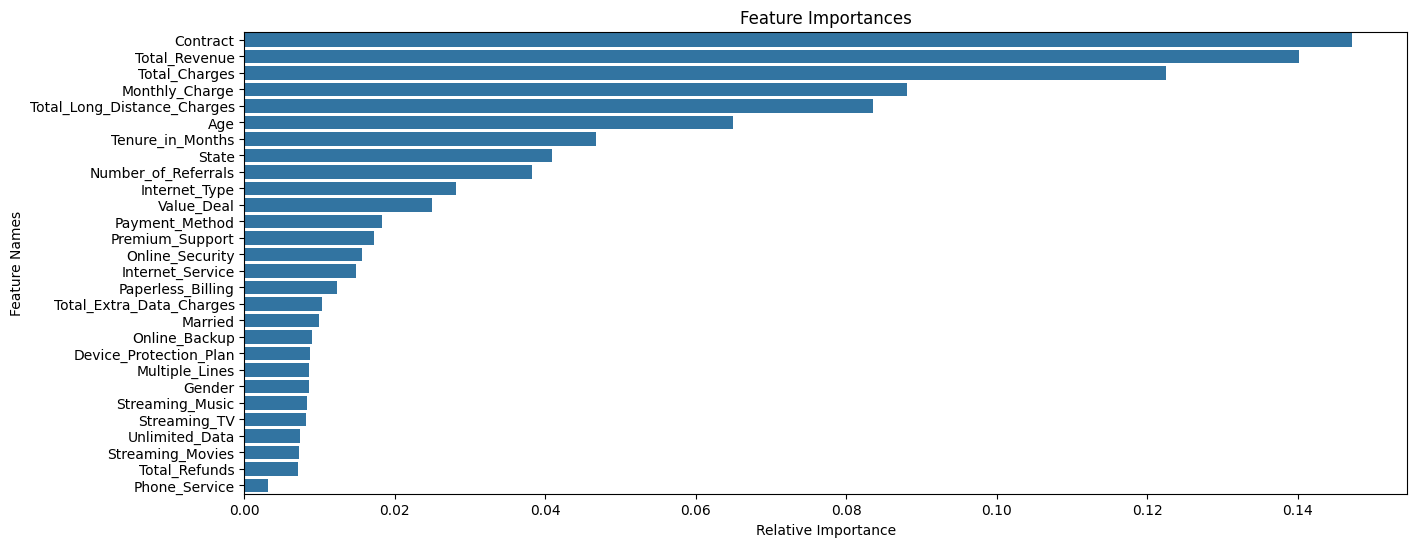

In [5]:
#predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [9]:

# 9. Predict on New Data (Joiner Data)

file_path = r"C:\Users\Swati\Documents\All Resume\Prediction Data.xlsx"
sheet_name = 'vw_JoinData'

new_data = pd.read_excel(file_path, sheet_name=sheet_name)
print(new_data.head())

# Retain original copy
original_data = new_data.copy()

# Keep Customer_ID
customer_ids = new_data['Customer_ID']

# Drop unnecessary columns
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical features with safety
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = new_data[column].fillna('Unknown')
    new_data[column] = new_data[column].apply(
        lambda x: label_encoders[column].transform([x])[0] if x in label_encoders[column].classes_ else -1
    )

# Predict
new_predictions = rf_model.predict(new_data)

# Add predictions to original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter predicted churners
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save results
churned_customers.to_csv(r"C:\Users\Swati\Documents\All Resume\Predictions.csv", index=False)

print("Predictions saved to Predictions.csv")


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4